In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler # for standarization feature
from sklearn.preprocessing import MinMaxScaler #for normalization feature
from sklearn.model_selection import train_test_split #for train and test split


In [2]:
df= sns.load_dataset('titanic') #load Titanic data set from seaborn
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df['parch'].value_counts() #value count of parch variable 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [4]:
df2=df[['survived','pclass','age','parch']] #take 4 numerica variable for applying feature scale 
df2

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0
...,...,...,...,...
886,0,2,27.0,0
887,1,1,19.0,0
888,0,3,NaN,2
889,1,1,26.0,0


In [5]:
df2.isnull().sum() # is null in age variable 

survived      0
pclass        0
age         177
parch         0
dtype: int64

In [18]:
df3=df2.fillna(df.mean()) # fill mean in na 
df3.isnull().sum() #check isnull 

C:\Users\VPO17\AppData\Local\Temp/ipykernel_14724/3713634264.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3=df2.fillna(df.mean()) # fill mean in na


survived    0
pclass      0
age         0
parch       0
dtype: int64

In [19]:
df3


,survived,pclass,age,parch
0,0,3,22.000000,0
1,1,1,38.000000,0
2,1,3,26.000000,0
3,1,1,35.000000,0
4,0,3,35.000000,0
...,...,...,...,...
886,0,2,27.000000,0
887,1,1,19.000000,0
888,0,3,29.699118,2
889,1,1,26.000000,0


In [20]:
"""survived is a target variable   and dependent so rest of 3 are independent variable """

X=df3.drop('survived',axis=1)
y=df3['survived']
print("shape of X=",X.shape)
print("shape of y=",y.shape)

shape of X= (891, 3)
shape of y= (891,)


In [21]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (712, 3)
Shape of y_train =  (712,)
Shape of X_test =  (179, 3)
Shape of y_test =  (179,)


In [25]:
X_train['age']

770    24.000000
152    55.500000
731    11.000000
775    18.000000
324    29.699118
         ...    
528    39.000000
709    29.699118
736    48.000000
485    29.699118
57     28.500000
Name: age, Length: 712, dtype: float64

In [23]:
sc= StandardScaler()
sc.fit(X_train)

StandardScaler()

In [26]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [27]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [30]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [32]:
X_train_sc=sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [33]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [35]:
X_train_sc = pd.DataFrame(X_train_sc,columns=["pclass",'age','parch'])
X_test_sc=pd.DataFrame(X_test_sc,columns=["pclass",'age','parch'])

In [37]:
X_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [39]:
X_train_sc.describe().round(2) #standardization done mean =0 and standard division =1

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [41]:
mmc=MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [43]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [44]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [45]:
X_train_mmc = pd.DataFrame(X_train_mmc,columns=["pclass",'age','parch'])
X_test_mmc=pd.DataFrame(X_test_mmc,columns=["pclass",'age','parch'])

In [47]:
X_train_mmc.describe().round(2)  #min=0 and max=1 thats means normaliziaion sucessfully 

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


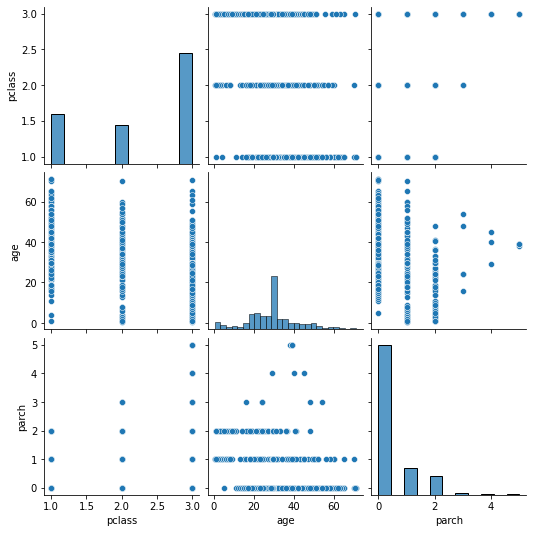

In [49]:
sns.pairplot(X_train)